In [1]:
import numpy as np
import pandas as pd
import os
import nibabel as nib
import nilearn as nl

In [2]:
path = "/root/miniconda3/Minor Project/dataset/Caltech/0051456/session_1/rest_1/rest.nii"

In [3]:
import nibabel as nib

# Load the NIfTI file
nii_file = nib.load("/root/miniconda3/Minor Project/dataset/Caltech/0051456/session_1/rest_1/rest.nii")

# Get the data array
data = nii_file.get_fdata()

# Print some details about the file
print(f"Shape of the data: {data.shape}")
print(f"Data type: {data.dtype}")


Shape of the data: (64, 64, 34, 150)
Data type: float64


In [4]:
# Get the header information
header = nii_file.header

# Print voxel dimensions (pixdim)
print(header)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  64  64  34 150   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   3.5  3.5  3.5  2.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.9914449
quatern_d       : 0.13052619
qoffset_x       : 109.28806
qoffset_y       : -42.437267
qoffset_z       : -67.601326


In [5]:
# import numpy as np
# from nilearn.connectome import ConnectivityMeasure

# # Calculate correlation between the regions
# correlation_measure = ConnectivityMeasure(kind='correlation')
# correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# # Binarize or threshold the correlation matrix to form the graph (optional)
# threshold = 0.5
# adjacency_matrix = np.where(correlation_matrix > threshold, 1, 0)


In [6]:
from nilearn import input_data, NiftiMasker

ImportError: cannot import name 'NiftiMasker' from 'nilearn' (/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/nilearn/__init__.py)

In [ ]:
from nilearn.glm.first_level import glover_hrf
hrf_model = glover_hrf(tr=2.0)  # Example with TR = 2s



In [7]:
from nilearn.input_data import NiftiMasker
from nilearn import image
import matplotlib.pyplot as plt
from nilearn import datasets
mni_mask = datasets.fetch_icbm152_brain_gm_mask()
fmri_img = image.load_img(path)

/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/root/miniconda3/envs/rapids-24.08/lib/python3.11/site-packages/joblib/memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)


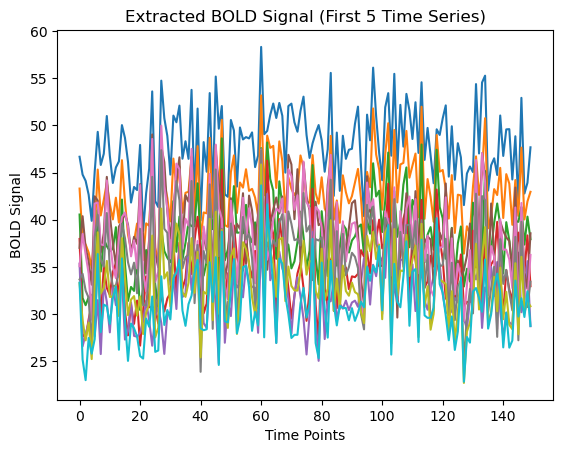

In [19]:

# Initialize NiftiMasker with optional mask
masker = NiftiMasker(mask_img=mni_mask)

# Fit the masker and transform the fMRI image to extract time series
time_series = masker.fit_transform(fmri_img)

# Plot the first few time series as an example
plt.plot(time_series[:, :10])
plt.title("Extracted BOLD Signal (First 5 Time Series)")
plt.xlabel("Time Points")
plt.ylabel("BOLD Signal")
plt.show()



In [16]:
time_series.shape

(150, 1529112)

In [17]:
type(time_series)

numpy.ndarray

In [18]:
time_series.ndim

2